# ABEL scanning example

By Carl A. Lindstrøm (University of Oslo), 8 Sep 2023

### Import ABEL framework

In [1]:
import sys
sys.path.append('../')
from abel import *
import numpy as np

initializing ocelot...


### Define the linac and beams

In [2]:
# define driver
driver = SourceBasic()
driver.charge = -2.7e10 * SI.e # [C]
driver.energy = 31.25e9 # [eV]
driver.rel_energy_spread = 0.01
driver.bunch_length = 42e-6 # [m]
driver.z_offset = 300e-6 # [m]
driver.emit_nx, driver.emit_ny = 10e-6, 10e-6 # [m rad]
driver.beta_x, driver.beta_y = 30e-3, 30e-3 # [m]
driver.num_particles = 10000
driver.jitter.x = 0e-9 # [m]
driver.jitter.y = 0e-9 # [m]

# define stage
stage = StageQuasistatic2dRadiationReaction()
stage.driver_source = driver
stage.nom_energy_gain = 31.9e9 # [eV]
stage.length = 5 # [m]
stage.plasma_density = 7e21 # [m^-3]
stage.ramp_beta_mag = 5
stage.enable_rr = True


# define first stage (half length)
first_stage = StageQuasistatic2dRadiationReaction()
first_stage.driver_source = stage.driver_source
first_stage.nom_energy_gain = stage.nom_energy_gain/2
first_stage.length = stage.length/2
first_stage.plasma_density = stage.plasma_density
first_stage.ramp_beta_mag = stage.ramp_beta_mag
first_stage.enable_rr = stage.enable_rr

# define beam
source = SourceBasic()
source.charge = -1e10 * SI.e # [C]
source.energy = 5e9 # [eV]
source.rel_energy_spread = 0.01
source.bunch_length = 18e-6 # [m]
source.z_offset = -34e-6 # [m]
source.emit_nx, source.emit_ny = 160e-6, 0.56e-6 # [m rad]
source.beta_x = stage.matched_beta_function(source.energy)
source.beta_y = source.beta_x
source.num_particles = 5000
source.jitter.t = driver.jitter.t

# define interstage
interstage = InterstageBasic()
interstage.beta0 = lambda E: stage.matched_beta_function(E)
interstage.dipole_length = lambda E: 1 * np.sqrt(E/10e9) # [m(eV)]
interstage.dipole_field = 1.0 # [T]

# beam delivery system
bds = BeamDeliverySystemBasic()
bds.beta_x, bds.beta_y = 8e-3, 0.4e-3 # [m]
bds.bunch_length = 0.75 * bds.beta_y

# define linac
linac = Linac()
linac.source = source
linac.stage = stage
linac.first_stage = first_stage
linac.interstage = interstage
linac.num_stages = 16

### Run simulation scan

In [55]:
# scan the driver timing jitter
linac.scan('scan_example_RR_320', 
           lambda obj, val: setattr(obj.source, 'emit_nx', val) or obj, 
           1e-6*np.array([10, 20, 40, 80, 160, 320]),
           label='Initial normalized emittance in x (mm mrad)',
           scale=1e-6,
           num_shots_per_step=1, 
           parallel=True,
           overwrite=False);

Output()

initializing ocelot...
>> SHOT 1 already exists and will not be overwritten.
initializing ocelot...
>> SHOT 6 already exists and will not be overwritten.
initializing ocelot...
>> SHOT 4 already exists and will not be overwritten.
initializing ocelot...
>> SHOT 3 already exists and will not be overwritten.
initializing ocelot...
>> SHOT 5 already exists and will not be overwritten.
initializing ocelot...
>> SHOT 2 already exists and will not be overwritten.


### Plot wakefield

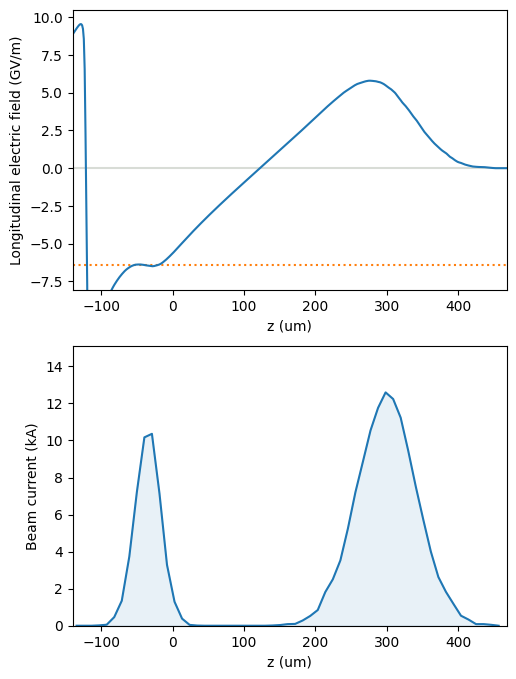

In [56]:
linac.stages[0].plot_wakefield()

### Plot scan

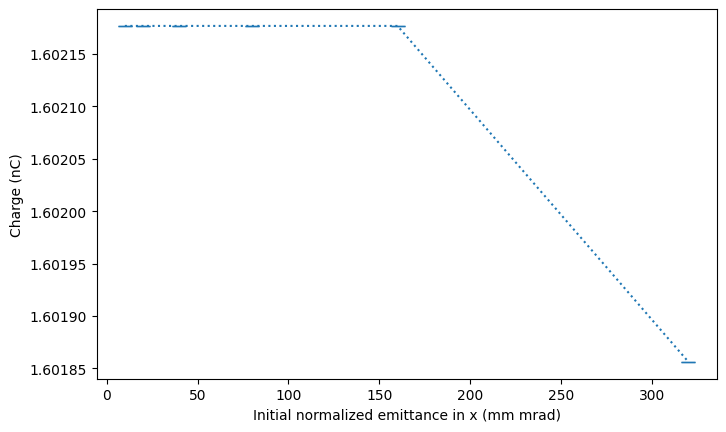

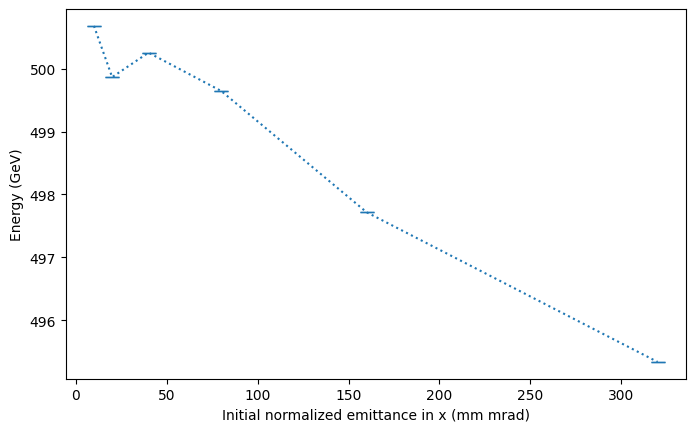

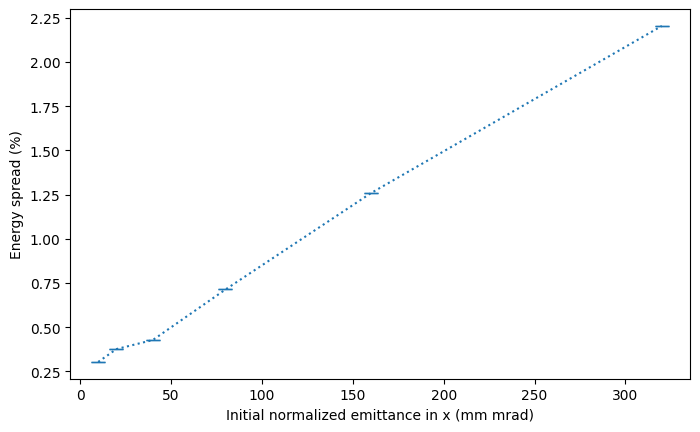

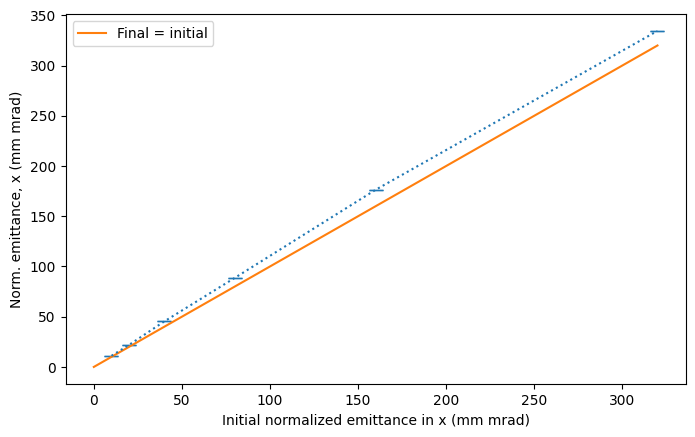

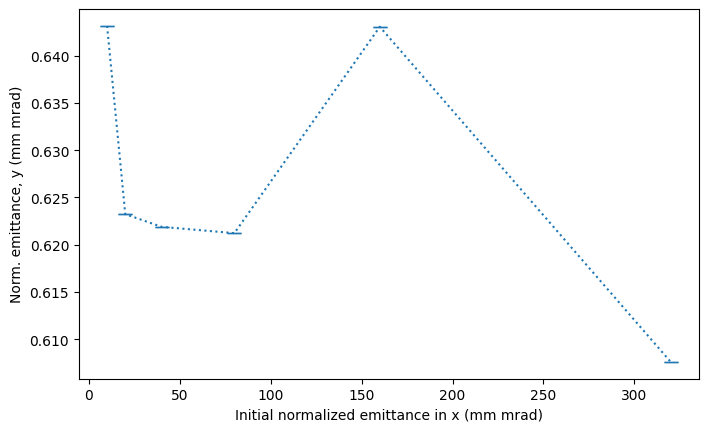

In [57]:
# plot energy spread vs bunch length
fig_1, ax1 = linac.plot_beam_function(Beam.charge, label='Charge (nC)', scale=-1e-9, xscale='linear', yscale='linear')
fig_2, ax2 = linac.plot_beam_function(Beam.energy, label='Energy (GeV)', scale=1e9, xscale='linear', yscale='linear')
fig_3, ax3 = linac.plot_beam_function(Beam.rel_energy_spread, label='Energy spread (%)', scale=1e-2, xscale='linear')
fig_4, ax4 = linac.plot_beam_function(Beam.norm_emittance_x, label='Norm. emittance, x (mm mrad)', scale=1e-6, xscale='linear')
fig_5, ax5 = linac.plot_beam_function(Beam.norm_emittance_y, label='Norm. emittance, y (mm mrad)', scale=1e-6, xscale='linear')
x = np.linspace(0,320,2)
ax4.plot(x,x, label = 'Final = initial')
ax4.legend()

emittance_y_RR = np.zeros(6)
E_spread_RR = np.zeros(6)
for i in range(6):
    E_spread_RR[i] = linac[i].get_beam(-1).rel_energy_spread()*1e2
    

In [58]:
plots = np.array(['charge', 'energy', 'energy_spread', \
                       'emittance_x', 'emittance_y'])
figs = [fig_1, fig_2, fig_3, fig_4, fig_5]
for pl, f in zip(plots,figs):
    f.savefig(fname = f'Linac_emittance_scan_{pl}_RR_320.png')

In [59]:
#for i in range(6):
#    linac[i].animate_lps(file_name=f'emittance_{10*2**i}_RR')

In [60]:
# define driver
driver = SourceBasic()
driver.charge = -2.7e10 * SI.e # [C]
driver.energy = 31.25e9 # [eV]
driver.rel_energy_spread = 0.01
driver.bunch_length = 42e-6 # [m]
driver.z_offset = 300e-6 # [m]
driver.emit_nx, driver.emit_ny = 10e-6, 10e-6 # [m rad]
driver.beta_x, driver.beta_y = 30e-3, 30e-3 # [m]
driver.num_particles = 10000
driver.jitter.x = 0e-9 # [m]
driver.jitter.y = 0e-9 # [m]

# define stage
stage = StageQuasistatic2dRadiationReaction()
stage.driver_source = driver
stage.nom_energy_gain = 31.9e9 # [eV]
stage.length = 5 # [m]
stage.plasma_density = 7e21 # [m^-3]
stage.ramp_beta_mag = 5
stage.enable_rr = False


# define first stage (half length)
first_stage = StageQuasistatic2dRadiationReaction()
first_stage.driver_source = stage.driver_source
first_stage.nom_energy_gain = stage.nom_energy_gain/2
first_stage.length = stage.length/2
first_stage.plasma_density = stage.plasma_density
first_stage.ramp_beta_mag = stage.ramp_beta_mag
first_stage.enable_rr = stage.enable_rr

# define beam
source = SourceBasic()
source.charge = -1e10 * SI.e # [C]
source.energy = 5e9 # [eV]
source.rel_energy_spread = 0.01
source.bunch_length = 18e-6 # [m]
source.z_offset = -34e-6 # [m]
source.emit_nx, source.emit_ny = 160e-6, 0.56e-6 # [m rad]
source.beta_x = stage.matched_beta_function(source.energy)
source.beta_y = source.beta_x
source.num_particles = 5000
source.jitter.t = driver.jitter.t

# define interstage
interstage = InterstageBasic()
interstage.beta0 = lambda E: stage.matched_beta_function(E)
interstage.dipole_length = lambda E: 1 * np.sqrt(E/10e9) # [m(eV)]
interstage.dipole_field = 1.0 # [T]

# beam delivery system
bds = BeamDeliverySystemBasic()
bds.beta_x, bds.beta_y = 8e-3, 0.4e-3 # [m]
bds.bunch_length = 0.75 * bds.beta_y

# define linac
linac = Linac()
linac.source = source
linac.stage = stage
linac.first_stage = first_stage
linac.interstage = interstage
linac.num_stages = 16

In [61]:
linac.scan('scan_example_RR_disabled_320', 
           lambda obj, val: setattr(obj.source, 'emit_nx', val) or obj, 
           1e-6*np.array([10, 20, 40, 80, 160, 320]),
           label='Initial normalized emittance in x (mm mrad)',
           scale=1e-6,
           num_shots_per_step=1, 
           parallel=True,
           overwrite=False);

Output()

>> SHOT 1 already exists and will not be overwritten.
>> SHOT 2 already exists and will not be overwritten.
>> SHOT 3 already exists and will not be overwritten.
>> SHOT 4 already exists and will not be overwritten.
>> SHOT 5 already exists and will not be overwritten.
>> SHOT 6 already exists and will not be overwritten.


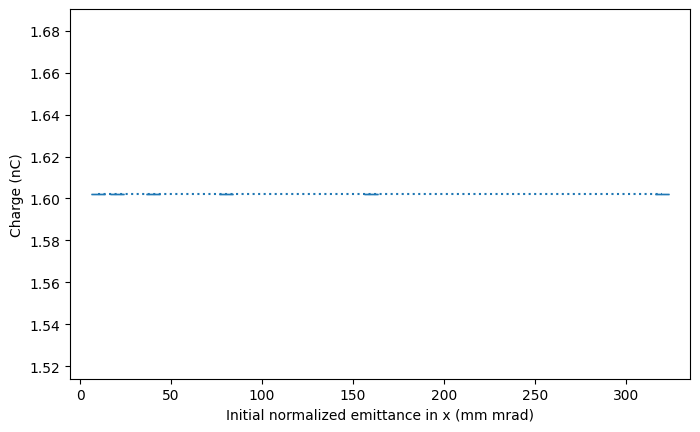

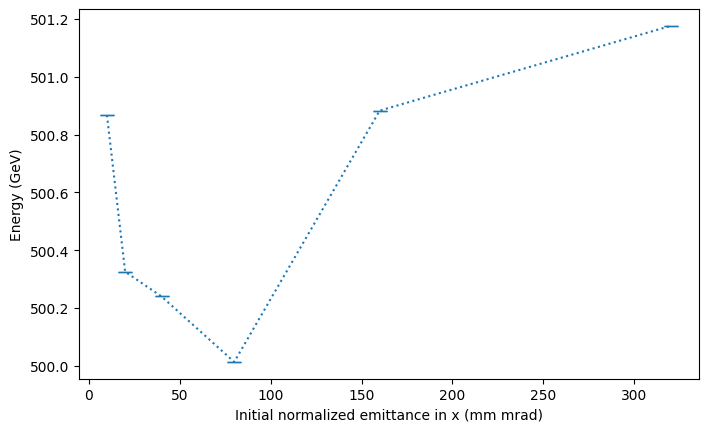

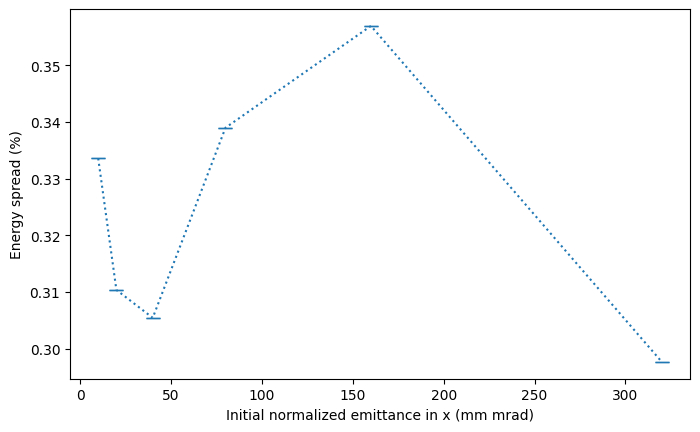

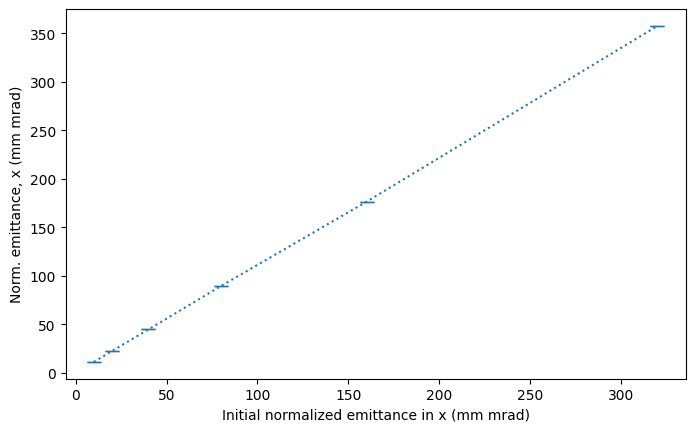

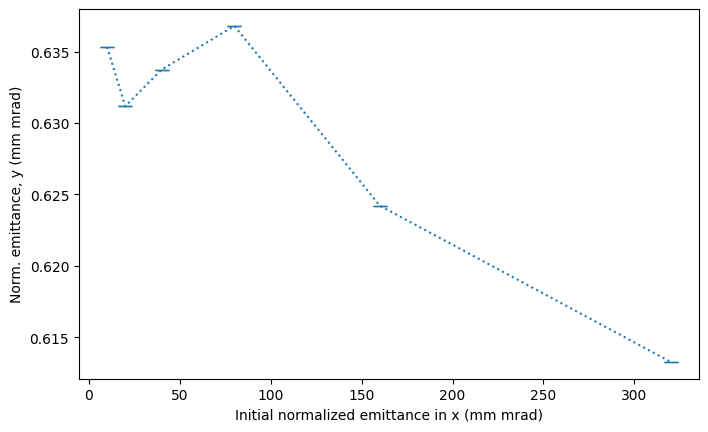

In [62]:
# plot energy spread vs bunch length
fig_1_noRR, ax1_noRR = linac.plot_beam_function(Beam.charge, label='Charge (nC)', scale=-1e-9, xscale='linear', yscale='linear')
fig_2_noRR, ax2_noRR = linac.plot_beam_function(Beam.energy, label='Energy (GeV)', scale=1e9, xscale='linear', yscale='linear')
fig_3_noRR, ax3_noRR = linac.plot_beam_function(Beam.rel_energy_spread, label='Energy spread (%)', scale=1e-2, xscale='linear')
fig_4_noRR, ax4_noRR = linac.plot_beam_function(Beam.norm_emittance_x, label='Norm. emittance, x (mm mrad)', scale=1e-6, xscale='linear')
fig_5_noRR, ax5_noRR = linac.plot_beam_function(Beam.norm_emittance_y, label='Norm. emittance, y (mm mrad)', scale=1e-6, xscale='linear')
fig_3_noRR.savefig('Linac_emittance_scan_energy_spread_RR_disabled_320.png')

emittance_y = np.zeros(6)
E_spread = np.zeros(6)
for i in range(6):
    E_spread[i] = linac[i].get_beam(-1).rel_energy_spread()*1e2
    

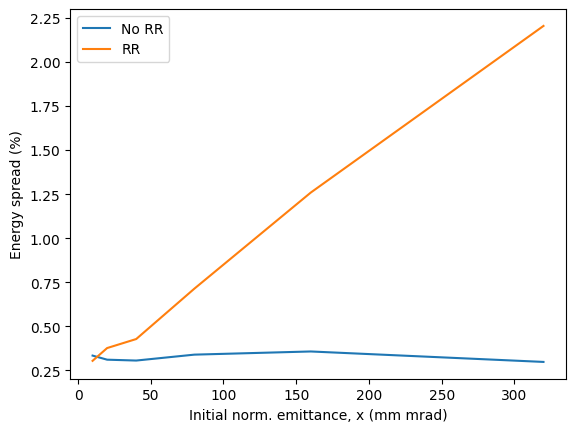

In [63]:
#x = np.linspace(0,320,2)
x_ = np.array([10,20,40,80,160,320])
fig, ax = plt.subplots()
ax.plot(x_, E_spread, label = 'No RR')
#ax.plot(x,x, label = 'Final = Initial')
ax.plot(x_,E_spread_RR, label = 'RR')
ax.set_xlabel('Initial norm. emittance, x (mm mrad)')
ax.set_ylabel('Energy spread (%)')
ax.legend()
fig.savefig(fname = f'Linac_emittance_scan_RR_and_no_RR_320_energy_spread.png')